<a href="https://colab.research.google.com/github/007saurabhvashistha/LGMVIP-Data_Science/blob/main/StockMarket_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Intern at Let's Grow More LGMVIP september 23


Beginner Level Task


Stock Market Prediction And Forecasting Using Stacked LSTM

Saurabh vashistha

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#importing data set
data_link = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv' #'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(data_link)
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
data.shape

(2035, 8)

In [ ]:
# Describing the data set
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [ ]:
data['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

<Axes: >

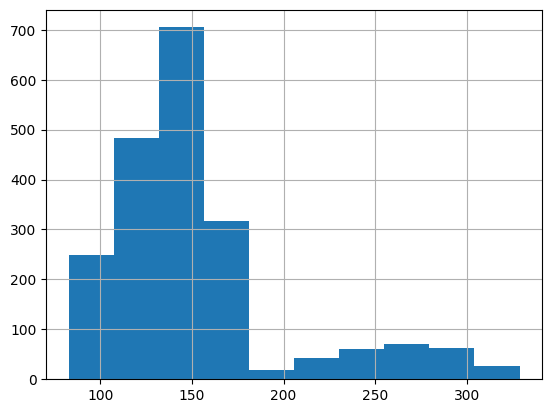

In [ ]:
data["High"].hist()

<Axes: >

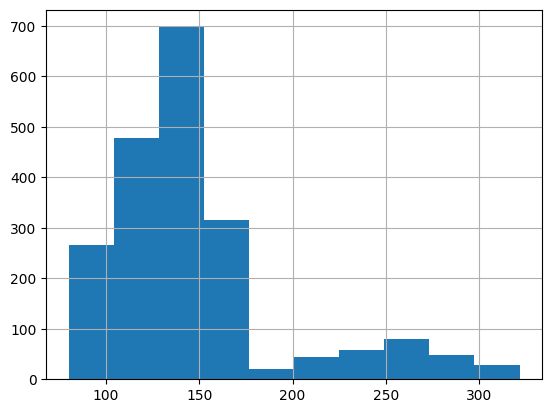

In [ ]:
data["Low"].hist()

<Axes: >

<Figure size 2000x800 with 0 Axes>

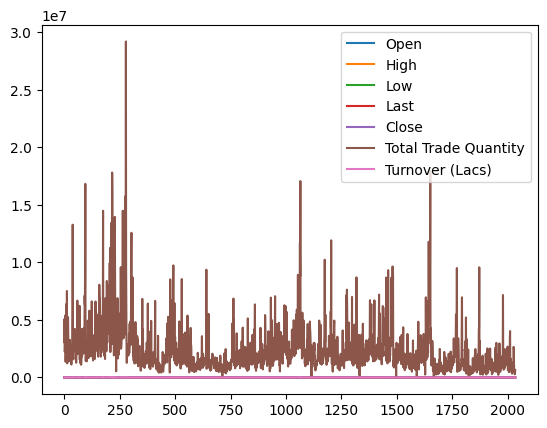

In [ ]:
plt.figure(figsize =(20,8))
data.plot()

In [ ]:
data_set = data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(data)*8)
training_data_len

16280

In [ ]:
dataset

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [ ]:
data=data.iloc[:,0:5]
data

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80
2031,2010-07-26,120.10,121.00,117.10,117.10
2032,2010-07-23,121.80,121.95,120.25,120.35
2033,2010-07-22,120.30,122.00,120.25,120.75


In [ ]:
training_set = data.iloc[:,1:2].values
training_set


array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

Scalling of data set

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,2))
data_training_scaled = scaler.fit_transform(training_set)


In [ ]:
features_set=[]
labels=[]
for i in range (60,586):
  features_set.append(data_training_scaled[i-60:i,0])
  labels.append(data_training_scaled[i,0])

In [ ]:
features_set,labels = np.array(features_set), np.array(labels)


In [ ]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

 Building The LSTM

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [ ]:
from tensorflow.python.keras.engine.training import optimizer_v1
model = Sequential()
model.compile(optimizer = "adam",loss = 'mean_squared_error')
model.fit(features_set,labels,epochs=80,batch_size=20)

AttributeError: ignored

In [ ]:
data_testing_comp=pd.read_csv(data_link)
data_testing_processed=data_testing_comp.iloc[:,1:2]
data_testing_processed


Prediction of  the data

In [ ]:
data_total = pd.concat((data['Open'], data['Open']),axis = 0)

In [ ]:
test_inputs = data_total[len(data_total)-len(data)-60:].values
test_inputs.shape

In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)


In [ ]:
t_features=[]
for i in range(60,89):
  t_features.append(test_inputs[i-60:i,0])


In [ ]:
t_features=np.array(t_features)
t_features = np.reshape(t_features, (t_features.shape[0] - t_features.shape[1],1))
t_features.shape

In [ ]:
pred = model.predict(t_features)
pred

In [ ]:
x_train = data[0:1256]
y_train = data[1:1257]
print(x_train.shape)
print(y_train.shape)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
np.random.seed(1)
np.random.randn(3,3)

Drawing a Single number  from the Normal Distribution

---



In [ ]:
np.random.normal(1)

Drawing a 5 number  from the Normal Distribution


In [ ]:
np.random.normal(1)

In [ ]:
np.random.normal(size = 1000, scale = 100).std()

Ploting results

In [ ]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_comp['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Total Trade Quantity', fontsize = 18)
plt.show()


Analyze the Closing Price from the Data frame


In [ ]:
data['Date']=pd.to_datetime(data.Date)
data.index = data['Date']

plt.figure(figsize =(20,10))
plt.plot(data['Open'],label ='Close Price Hist')


In [ ]:
plt.figure(figsize=(18,6))
plt.plot(data['Date'])
plt.xlabel('Turnover (lacs)', fontsize = 18)
plt.ylabel('Total Trade Quantity', fontsize = 18)
plt.show()

In [ ]:
data['Turnover (lacs)']=pd.to_datetime(data.Date)
data.index = data['Turnover (lacs)']

plt.figure(figsize =(20,10))
plt.plot(data['Turnover (lacs)'],label ='Close Price Hist')

In [ ]:
sns.set9rc = {"figure.figsize":(20,5)}
data['Open'].plot(linewidth = 1,color='Green')

In [ ]:
data.columns

In [ ]:
df = pd.read_csv(data_link)
df

In [ ]:
col_plot = ['Open','High','Low','Last','Close']
axes = df[col_plot].plot(alpha =1,figsize=(20,30),subplots=True)

for i in axes:
  i.set_ylabel('Variation')